Spatial Filtering (Averaging) Using filter2D


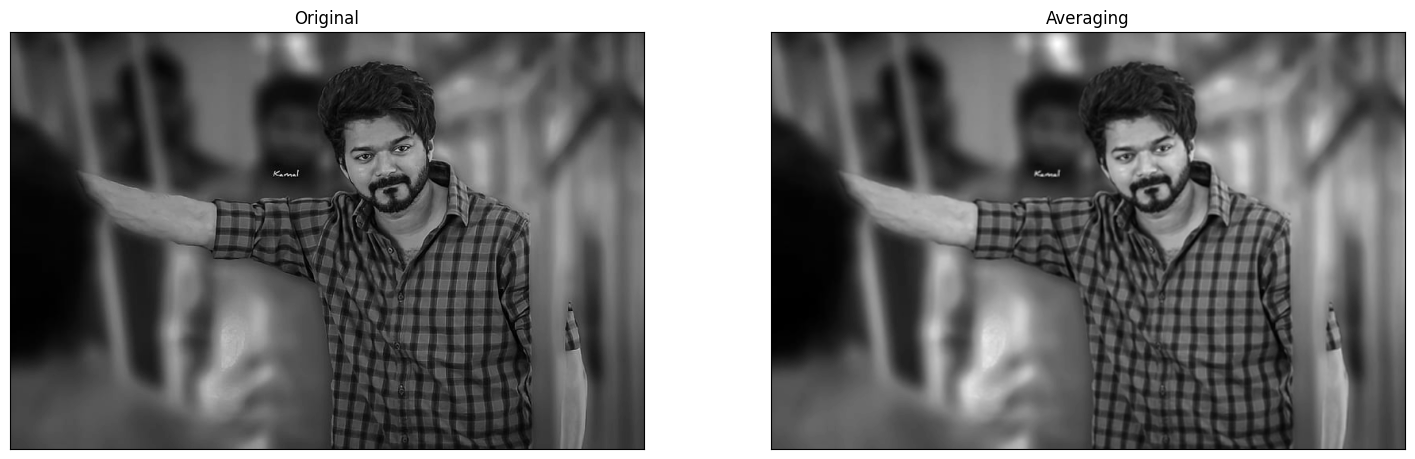

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/vj.jpg', cv.IMREAD_GRAYSCALE)  # Use 'IMREAD_GRAYSCALE' for grayscale image

kernel = np.ones((3, 3), np.float32) / 9
imgc = cv.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()


Spatial Filtering (Sobel Vertical) Using filter2D

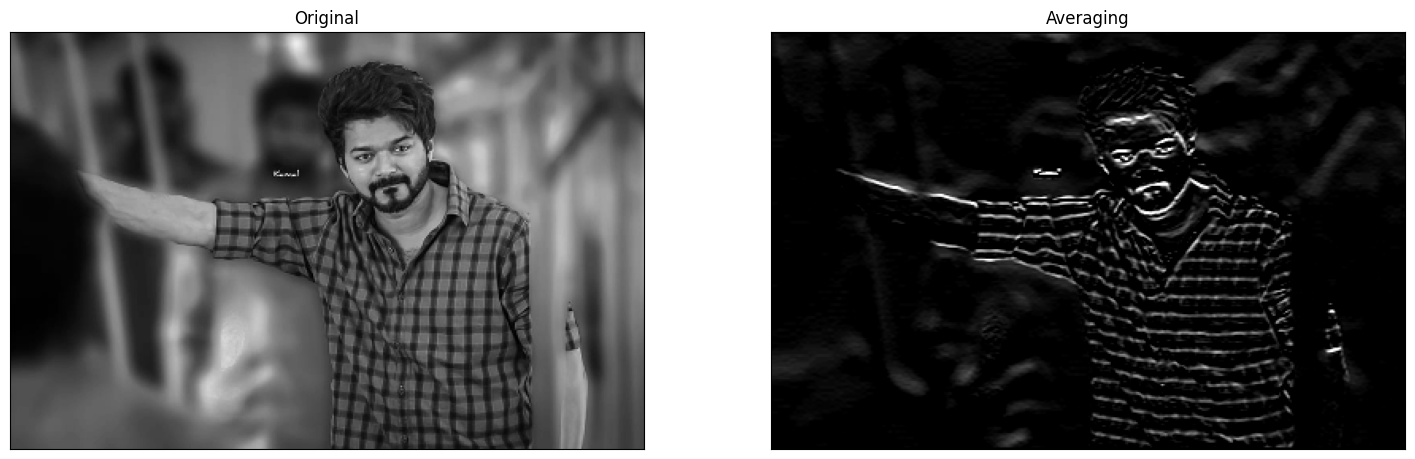

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/vj.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()

isting: Filtering Using Loops

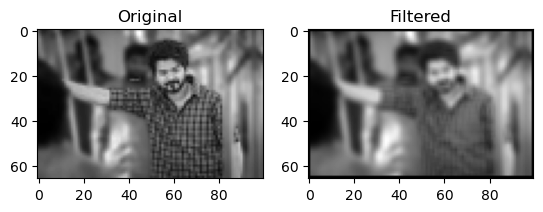

In [1]:
# Import necessary libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Define a function for filtering an image with a kernel
def filter(image, kernel):
    # Ensure that the kernel has an odd width and height
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    
    # Calculate half-height and half-width of the kernel
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    
    # Get the dimensions (height and width) of the input image
    h, w = image.shape
    
    # Normalize the input image to the range [0.0, 1.0]
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    
    # Create an empty result image
    result = np.zeros(image.shape, 'float')

    # Loop through the pixels of the input image
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            # Perform convolution at each pixel location
            result[m, n] = np.dot(image_float[m - k_hh: m + k_hh + 1, n - k_hw: n + k_hw + 1].flatten(),
                                  kernel.flatten())
    
    # Return the filtered result
    return result

# Read the input image (change the path to your image)
img = cv.imread('images/vj.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)

# Create a figure with two subplots for original and filtered images
fig, ax_arr = plt.subplots(1, 2)

# Display the original image in the first subplot
ax_arr[0].imshow(img, cmap="gray")
ax_arr[0].set_title('Original')

# Define a kernel for filtering (in this case, a simple averaging kernel)
kernel = np.array([(1 / 9, 1 / 9, 1 / 9), (1 / 9, 1 / 9, 1 / 9), (1 / 9, 1 / 9, 1 / 9)], dtype='float')

# Apply the filter to the image
imgb = filter(img, kernel)

# Scale the filtered result back to the range [0, 255] and convert to uint8
imgb = imgb * 255.0
imgb = imgb.astype(np.uint8)

# Display the filtered image in the second subplot
ax_arr[1].imshow(imgb, cmap="gray")
ax_arr[1].set_title('Filtered')

# Show the figure with both original and filtered images
plt.show()
